In [41]:
!pip install nltk
 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 12.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.stem import WordNetLemmatizer


In [3]:
df_test = pd.read_csv('data/new_test.csv')

In [4]:
df_test.head()

,Unnamed: 0,transcription
0,0,"PAST MEDICAL CONDITION:, None.,ALLERGIES:, N..."
1,1,"CURRENT HISTORY:, A 94-year-old female from t..."
2,2,"TITLE OF PROCEDURE: ,Coronary artery bypass g..."
3,3,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi..."
4,4,"OPERATIVE PROCEDURES: , Colonoscopy and biopsi..."


In [5]:
df_train = pd.read_csv('data/new_train.csv')

In [6]:
df_train.head()

,Unnamed: 0,medical_specialty,transcription,labels
0,0,Emergency Room Reports,"REASON FOR THE VISIT:, Very high PT/INR.,HIST...",0
1,1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1
2,2,Surgery,"NAME OF PROCEDURE,1. Selective coronary angio...",1
3,3,Radiology,"REFERRING DIAGNOSIS: , Motor neuron disease.,P...",2
4,4,Emergency Room Reports,"CHIEF COMPLAINT: , Dental pain.,HISTORY OF PRE...",0


In [7]:
df_train.columns

Index(['Unnamed: 0', 'medical_specialty', 'transcription', 'labels'], dtype='object')

In [8]:
df_train.labels.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [9]:
df_train.medical_specialty.unique()

array([' Emergency Room Reports', ' Surgery', ' Radiology', ' Podiatry',
       ' Neurology', ' Gastroenterology', ' Orthopedic',
       ' Cardiovascular / Pulmonary', ' Nephrology',
       ' ENT - Otolaryngology', ' General Medicine',
       ' Hematology - Oncology', ' Cosmetic / Plastic Surgery',
       ' SOAP / Chart / Progress Notes', ' Chiropractic',
       ' Psychiatry / Psychology', ' Consult - History and Phy.',
       ' Hospice - Palliative Care', ' Neurosurgery',
       ' Obstetrics / Gynecology', ' Urology', ' Discharge Summary',
       ' Autopsy', ' Dermatology', ' Letters', ' Office Notes',
       ' Lab Medicine - Pathology', ' Ophthalmology',
       ' Speech - Language', ' Dentistry', ' Pediatrics - Neonatal',
       ' Physical Medicine - Rehab', ' Bariatrics', ' Endocrinology',
       ' Pain Management', ' IME-QME-Work Comp etc.',
       ' Allergy / Immunology', ' Sleep Medicine',
       ' Diets and Nutritions', ' Rheumatology'], dtype=object)

In [10]:
preprocessed_train_df = pd.read_csv("data/df_train_processed.csv")

In [11]:
preprocessed_train_df.head(15)

,Unnamed: 0,medical_specialty,transcription,labels,idx,transcription_len,transcription_word_count,processed_transcription,processed_transcription_len,processed_transcription_word_count,...,word_count_unique_in_32,word_count_unique_in_33,word_count_unique_in_34,word_count_unique_in_35,word_count_unique_in_37,word_count_unique_in_38,word_count_unique_in_39,age,younger_than_1,count_listing_nums
0,0,Emergency Room Reports,"REASON FOR THE VISIT:, Very high PT/INR.,HIST...",0,0,2354,366,reason visit high pt inr history patient N yea...,1530,232,...,0,0,0,0,0,0,0,81.0,0,24
1,1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1,1,2697,405,preoperative diagnosis acetabular fracture lef...,1989,244,...,0,0,0,0,0,0,0,0.0,0,2
2,2,Surgery,"NAME OF PROCEDURE,1. Selective coronary angio...",1,2,5222,821,name procedure N selective coronary angiograph...,3834,536,...,0,0,0,0,0,0,0,65.0,0,7
3,3,Radiology,"REFERRING DIAGNOSIS: , Motor neuron disease.,P...",2,3,3029,457,referring diagnosis motor neuron disease perti...,2279,287,...,0,0,0,0,0,0,0,83.0,0,0
4,4,Emergency Room Reports,"CHIEF COMPLAINT: , Dental pain.,HISTORY OF PRE...",0,4,3391,534,chief complaint dental pain history present il...,2354,330,...,0,0,0,0,0,0,0,45.0,0,9
5,5,Podiatry,"S -, A 44-year-old, 250-pound male presents wi...",3,5,967,180,N year old N pound male presents extreme pain...,594,94,...,0,0,0,0,0,0,0,0.0,0,1
6,6,Emergency Room Reports,"HISTORY:, The patient is a 25-year-old gentle...",0,6,3277,514,history patient N year old gentleman seen emer...,2278,313,...,0,0,0,0,0,0,0,25.0,0,0
7,7,Neurology,"CC:, Left hemiplegia.,HX: , A 58 y/o RHF awoke...",4,7,2444,339,cc left hemiplegia hx N y o rhf awoke N Nam N ...,1934,270,...,0,0,0,0,0,0,0,58.0,0,0
8,8,Gastroenterology,"PROCEDURE:, Upper endoscopy.,PREOPERATIVE DIA...",5,8,1382,190,procedure upper endoscopy preoperative diagnos...,1030,138,...,0,0,0,0,0,0,0,50.0,0,6
9,9,Surgery,"PREOPERATIVE DIAGNOSIS:, Stage IV necrotic sa...",1,9,1230,183,preoperative diagnosis stage iv necrotic sacra...,915,117,...,0,0,0,0,0,0,0,92.0,0,0


In [12]:
preprocessed_train_df.shape

(3969, 54)

In [13]:
preprocessed_train_df.columns 
# note there are no columns for word_count_unique_in_36 and word_count_unique_in_31 since there are no unique words specific to that label

Index(['Unnamed: 0', 'medical_specialty', 'transcription', 'labels', 'idx',
       'transcription_len', 'transcription_word_count',
       'processed_transcription', 'processed_transcription_len',
       'processed_transcription_word_count', 'transcription_words', 'male',
       'female', 'word_count_unique_in_0', 'word_count_unique_in_1',
       'word_count_unique_in_2', 'word_count_unique_in_3',
       'word_count_unique_in_4', 'word_count_unique_in_5',
       'word_count_unique_in_6', 'word_count_unique_in_7',
       'word_count_unique_in_8', 'word_count_unique_in_9',
       'word_count_unique_in_10', 'word_count_unique_in_11',
       'word_count_unique_in_12', 'word_count_unique_in_13',
       'word_count_unique_in_14', 'word_count_unique_in_15',
       'word_count_unique_in_16', 'word_count_unique_in_17',
       'word_count_unique_in_18', 'word_count_unique_in_19',
       'word_count_unique_in_20', 'word_count_unique_in_21',
       'word_count_unique_in_22', 'word_count_unique_in_

In [14]:
[i for i in preprocessed_train_df.columns if preprocessed_train_df[i].isnull().any()] # -> gender
preprocessed_train_df.gender.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'gender'

In [15]:
preprocessed_train_df.medical_specialty.value_counts()

 Surgery                          863
 Consult - History and Phy.       410
 Cardiovascular / Pulmonary       309
 Orthopedic                       289
 Radiology                        213
 General Medicine                 209
 Gastroenterology                 176
 Neurology                        170
 SOAP / Chart / Progress Notes    135
 Urology                          134
 Obstetrics / Gynecology          123
 Discharge Summary                 87
 ENT - Otolaryngology              82
 Neurosurgery                      71
 Hematology - Oncology             68
 Ophthalmology                     67
 Emergency Room Reports            63
 Nephrology                        63
 Pediatrics - Neonatal             55
 Pain Management                   54
 Psychiatry / Psychology           45
 Office Notes                      38
 Podiatry                          35
 Dermatology                       21
 Dentistry                         21
 Cosmetic / Plastic Surgery        19
 Letters    

In [16]:
preprocessed_train_df.loc[preprocessed_train_df["female"] == 1, "gender"] = "female"
preprocessed_train_df.loc[preprocessed_train_df["male"] == 1, "gender"] = "male"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, ' Surgery'),
  Text(1, 0, ' Consult - History and Phy.'),
  Text(2, 0, ' Cardiovascular / Pulmonary'),
  Text(3, 0, ' Orthopedic'),
  Text(4, 0, ' Radiology'),
  Text(5, 0, ' General Medicine'),
  Text(6, 0, ' Gastroenterology'),
  Text(7, 0, ' Neurology'),
  Text(8, 0, ' SOAP / Chart / Progress Notes'),
  Text(9, 0, ' Urology'),
  Text(10, 0, ' Obstetrics / Gynecology'),
  Text(11, 0, ' Discharge Summary'),
  Text(12, 0, ' ENT - Otolaryngology'),
  Text(13, 0, ' Neurosurgery'),
  Text(14, 0, ' Hematology - Oncology'),
  Text(15, 0, ' Ophthalmology'),
  Text(16, 0, ' Emergency Room Reports'),
  Text(17, 0, ' Nephrology'),
  Text(18, 0, ' Pediatrics - Neonatal'),
  Text(19, 0, ' Pain Management'),
  Text(20, 0, ' Psychiatry / Psychology'),
  Text(21, 0, ' Office Notes'),
  Text(22, 0, ' Podi

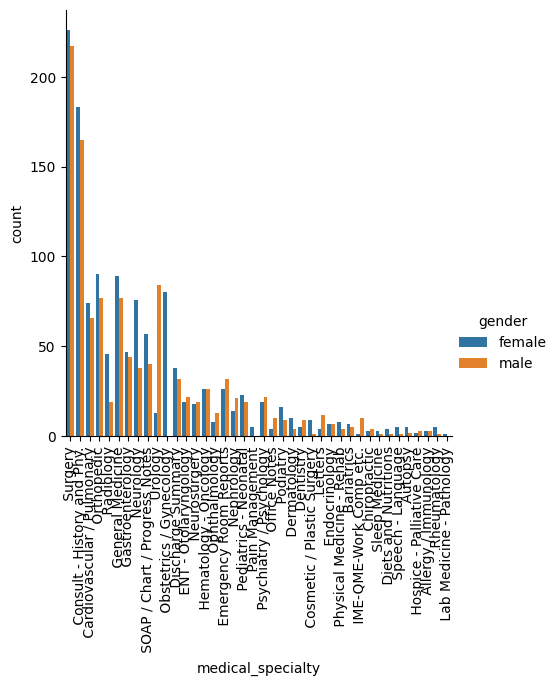

In [17]:
sns.catplot(data=preprocessed_train_df, x="medical_specialty", kind="count", hue="gender", order=preprocessed_train_df["medical_specialty"].value_counts().index)
plt.xticks(rotation=90)

In [18]:
preprocessed_train_df.gender.value_counts()

female    1279
male      1120
Name: gender, dtype: int64

In [20]:
preprocessed_train_df.loc[preprocessed_train_df.gender.isnull()]

,Unnamed: 0,medical_specialty,transcription,labels,idx,transcription_len,transcription_word_count,processed_transcription,processed_transcription_len,processed_transcription_word_count,...,word_count_unique_in_33,word_count_unique_in_34,word_count_unique_in_35,word_count_unique_in_37,word_count_unique_in_38,word_count_unique_in_39,age,younger_than_1,count_listing_nums,gender
1,1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1,1,2697,405,preoperative diagnosis acetabular fracture lef...,1989,244,...,0,0,0,0,0,0,0.0,0,2,NaN
10,10,Gastroenterology,"EXAM: , CT of the abdomen and pelvis without c...",5,10,2907,408,exam ct abdomen pelvis without contrast histor...,2260,289,...,0,0,0,0,0,0,0.0,0,7,NaN
12,12,Orthopedic,"PREOPERATIVE DIAGNOSIS:, Right wrist lacerati...",6,12,2255,340,preoperative diagnosis right wrist laceration ...,1659,228,...,0,0,0,0,0,0,21.0,0,2,NaN
14,14,Nephrology,"PSYCHOSOCIAL DONOR EVALUATION,Following questi...",8,14,1944,301,psychosocial donor evaluation following questi...,1231,170,...,0,0,0,0,0,0,0.0,0,0,NaN
17,17,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, The patient has pr...",7,17,2590,355,indications procedure patient presented crushi...,2101,281,...,0,0,0,0,0,1,0.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,3961,Cosmetic / Plastic Surgery,"PREOPERATIVE DIAGNOSES:,1. Request for cosmet...",12,3992,5154,782,preoperative diagnoses N request cosmetic surg...,3755,488,...,0,0,0,0,0,2,28.0,0,6,NaN
3962,3962,Cardiovascular / Pulmonary,"PROCEDURE: , Urgent cardiac catheterization wi...",7,3993,972,148,procedure urgent cardiac catheterization coron...,677,91,...,0,0,0,0,0,0,0.0,0,4,NaN
3965,3965,Surgery,"PREOPERATIVE DIAGNOSIS: , Anemia.,PROCEDURE:, ...",1,3996,932,136,preoperative diagnosis anemia procedure upper ...,688,89,...,0,0,0,0,0,1,0.0,0,3,NaN
3967,3967,Gastroenterology,The patient's abdomen was prepped and draped i...,5,3998,1235,183,patient s abdomen prepped draped usual sterile...,913,118,...,0,0,0,0,0,0,0.0,0,0,NaN


In [34]:
label_unique_words = pd.read_csv('data/label_unique_words.csv')

In [36]:
label_unique_words

,Unnamed: 0,label,percent_exist,medical_specialty,words
0,0,0,"[['vap', 1.59], ['dacuronium', 1.59], ['reward...",Emergency Room Reports,"['vap', 'dacuronium', 'rewarding', 'attendings..."
1,1,1,"[['inset', 0.35], ['reinspected', 0.35], ['ele...",Surgery,"['inset', 'reinspected', 'electrobovie', 'floo..."
2,2,2,"[['sequences', 0.94], ['ultrasonographic', 0.9...",Radiology,"['sequences', 'ultrasonographic', 'ictal', 'ma..."
3,3,3,"[['rubor', 5.71], ['embolectomy', 2.86], ['int...",Podiatry,"['rubor', 'embolectomy', 'introductions', 'dru..."
4,4,4,"[['putamen', 1.18], ['kilo', 1.18], ['tfts', 1...",Neurology,"['putamen', 'kilo', 'tfts', 'laughter', 'gyri'..."
5,5,5,"[['train', 0.57], ['parmigiana', 0.57], ['endo...",Gastroenterology,"['train', 'parmigiana', 'endoscissors', 'misse..."
6,6,6,"[['bucket', 1.04], ['trochlea', 0.69], ['smoot...",Orthopedic,"['bucket', 'trochlea', 'smoothened', 'methylme..."
7,7,7,"[['graftotomy', 0.65], ['trigemini', 0.65], ['...",Cardiovascular / Pulmonary,"['graftotomy', 'trigemini', 'puckered', 'inked..."
8,8,8,"[['welchol', 1.59], ['southeast', 1.59], ['irr...",Nephrology,"['welchol', 'southeast', 'irretrievably', 'gen..."
9,9,9,"[['armstrong', 2.44], ['footplates', 2.44], ['...",ENT - Otolaryngology,"['armstrong', 'footplates', 'vasoconstricted',..."
